In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import winsound, os
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
import time

In [13]:
# The following function generates a continuous time sinusoid
# given the amplitude A, F (cycles/seconds), Fs=sampling rate, start and endtime
def fnGenSampledSinusoid(A,Freq,Phi,Fs,sTime,eTime):
    # Showing off how to use numerical python library to create arange
    n = np.arange(sTime,eTime,1.0/Fs)
    y = A*np.cos(2 * np.pi * Freq * n + Phi)
    return [n,y]

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalizeFloatTo16Bit(yFloat):
    y_16bit = [int(s*32767) for s in yFloat]
    return(np.array(y_16bit, dtype='int16'))

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalize16BitToFloat(y_16bit):
    yFloat = [float(s/32767.0) for s in y_16bit]
    return(np.array(yFloat, dtype='float'))

def convolve(x, h):
    #Our function follow the numpy convolution with no truncation
    #First step is to get the final array with size as x.size + h.size -1
    x_length = np.size(x)
    h_length = np.size(h)

    y = np.zeros(x_length + h_length - 1)

    #As we loop through the range of 1 signal at each sample index
    #Create the other signal starting at that sample index
    #Once created, sum all the amplitude of all the signals at that particular index
    #Here we can do it directly in the same for loop sinze we initialized the result array to 0
    for i in np.arange(x_length):
        for j in np.arange(h_length):
            y[i + j] = y[i + j] + x[i] * h[j]
        #print("Loop (on x_signal): ", i)

    #print("Done")
    return y

def save_sound(file_name, sampling_frequency, bits):
    wavfile.write(file_name, sampling_frequency, bits)

def play_sound(file_name):
    os.system("aplay " + file_name)

def read_sound(file_name):
    return wavfile.read(file_name)

def delta(n):
    if n == 0:
        return 1
    else:
        return 0

## Question 1

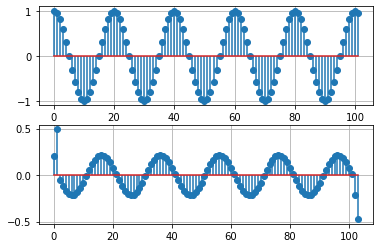

In [11]:
# Since 0.1 pi per sample index, to cover 2 pi (1 cycle) -> 20 sample index
# 0-19 is one sample, 20 - 39 is the next sample, so on.
# Here we choose 101 => the last cycle and 1 more.

# Here is the sample index space
n = np.arange(0, 102)

# Here is the signal
x = np.cos(0.1 * np.pi * n)

# Here is the filter/impuse response coeff
h = np.array([0.2, 0.3, -0.5])

# Convolution in Python
y = np.convolve(x, h)

# Plot the resultsj
_, ax = plt.subplots(2, 1)
ax[0].stem(x)
ax[0].grid()
ax[1].stem(y)
ax[1].grid()
plt.show()

## Question 3a

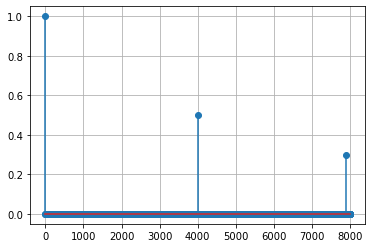

In [14]:
# Assumed finite with this number of sample index
impulseH = np.zeros(8000)
impulseH[1] = 1
impulseH[4000] = 0.5
impulseH[7900] = 0.3

# Plotting the impulse response / that characterise the lti system/ filter.
plt.stem(impulseH)
plt.grid()
plt.show()

# First get the input signal and impulse response
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
h = np.array([1, 2, 3, 4, 5, 6])

# convolve test with our implementation
y_test = convolve(x, h)

# test with numpy function
y = np.convolve(x, h)
comparison = y == y_test
assert comparison.all()

## Question 3b

In [20]:
impulseH = np.zeros(8000)
impulseH[1] = 1
impulseH[4000] = 0.5
impulseH[7900] = 0.3
    
# Clean file
play_sound('t1_16bit.wav')

# Read in the sound, convert to float
Fs, sampleX_16bit = read_sound('t1_16bit.wav')
sampleX_float = fnNormalize16BitToFloat(sampleX_16bit)
    
print(sampleX_float.shape)

# Filter with our convolution
start = time.time()
y = np.convolve(sampleX_float, impulseH)
print("Time: ",time.time()-start)

# Downsampled and save
y_16bit = fnNormalizeFloatTo16Bit(y)
save_file_name = "t2_16bit.wav"
save_sound(save_file_name, Fs, y_16bit)
play_sound(save_file_name)

(6400,)
Time:  0.01800084114074707


## Question 4a

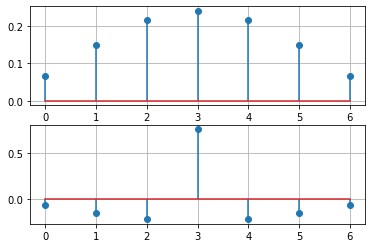

In [21]:
h1 = np.array([0.06523, 0.14936, 0.21529, 0.2402, 0.21529, 0.14936, 0.06523], dtype='float')
h2 = np.array([-0.06523, -0.14936, -0.21529, 0.7598, -0.21529, -0.14936, -0.06523], dtype='float')
_, ax = plt.subplots(2, 1)
ax[0].stem(h1)
ax[0].grid()
ax[1].stem(h2)
ax[1].grid()
plt.show()

## Question 4b

[ 0.06523  0.14936  0.21529  0.2402   0.21529  0.14936  0.06523  0.
  0.       0.       0.       0.       0.       0.       0.      -0.13046]
[ 0.06523  0.14936  0.21529  0.2402   0.21529  0.14936  0.06523  0.
  0.       0.       0.       0.       0.       0.       0.      -0.13046]
[ 0.06523  0.14936  0.21529  0.2402   0.21529  0.14936  0.06523  0.
  0.       0.       0.       0.       0.       0.       0.      -0.13046]
[-0.06523 -0.14936 -0.21529  0.7598  -0.21529 -0.14936 -0.06523  0.
  0.       0.       0.       0.       0.       0.       0.       0.13046]
[-0.06523 -0.14936 -0.21529  0.7598  -0.21529 -0.14936 -0.06523  0.
  0.       0.       0.       0.       0.       0.       0.       0.13046]
[-0.06523 -0.14936 -0.21529  0.7598  -0.21529 -0.14936 -0.06523  0.
  0.       0.       0.       0.       0.       0.       0.       0.13046]


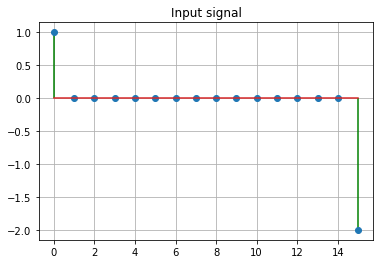

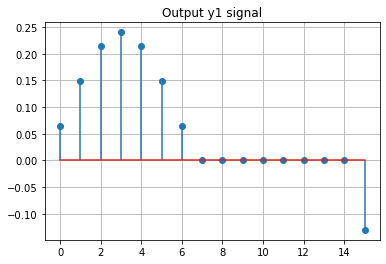

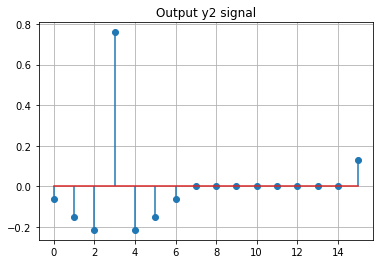

In [22]:
h1 = np.array([0.06523, 0.14936, 0.21529, 0.2402, 0.21529, 0.14936, 0.06523], dtype='float')
h2 = np.array([-0.06523, -0.14936, -0.21529, 0.7598, -0.21529, -0.14936, -0.06523], dtype='float')

# Range of sample index (0 to 16)
# Create the input signal
n = np.arange(0, 16)
x = np.zeros(len(n))
for i in range(len(n)):
    # At n[15]=15, delta(15-15) = delta(0)
    x[i] = delta(n[i]) - 2 * delta(n[i] - 15)

# Sanity check of input signal with a stem plot
plt.figure(1)
plt.grid()
plt.stem(n,x,'g-o',use_line_collection=True)
plt.title("Input signal")

# Result for comparison
results_1_1 = convolve(x, h1)[0:len(n)]
results_1_2 = np.convolve(x, h1)[0:len(n)]
results_1_3 = signal.lfilter(h1, [1], x)
print(results_1_1)
print(results_1_2)
print(results_1_3)

plt.figure(2)
plt.grid()
plt.stem(results_1_1,use_line_collection=True)
plt.title("Output y1 signal")

results_2_1 = convolve(x, h2)[0:len(n)]
results_2_2 = np.convolve(x, h2)[0:len(n)]
results_2_3 = signal.lfilter(h2, [1], x)
print(results_2_1)
print(results_2_2)
print(results_2_3)

plt.figure(3)
plt.grid()
plt.stem(results_2_1,use_line_collection=True)
plt.title("Output y2 signal")

plt.show()

## Question 4c

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_25224/2943150988.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, 10*np.log10(Sxx))


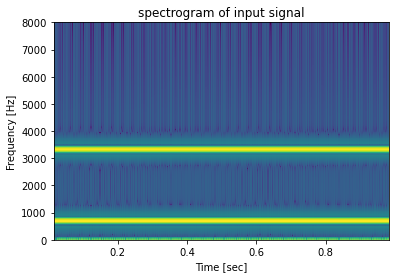

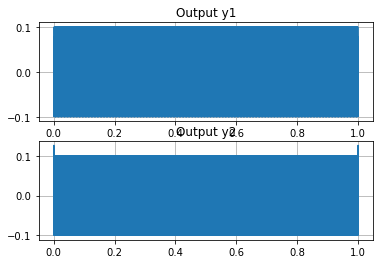

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_25224/2943150988.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(t1, f1, 10*np.log10(Sxx1))
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_25224/2943150988.py:52: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(t2, f2, 10*np.log10(Sxx2))


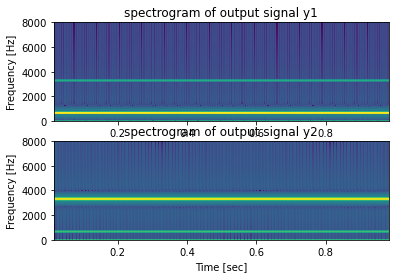

In [23]:
# Given system characteristics
h1 = np.array([0.06523, 0.14936, 0.21529, 0.2402, 0.21529, 0.14936, 0.06523], dtype='float')
h2 = np.array([-0.06523, -0.14936, -0.21529, 0.7598, -0.21529, -0.14936, -0.06523], dtype='float')

# Generate the signals
# Amplitude, frequency (Hz), sampling frequency, start time, stop time
# Meant to generate for 1 sec but may cut down so easier to verify
_, x1 = fnGenSampledSinusoid(0.1, 700, 0, 16000, 0, 1.0 + 1/16000)
_, x2 = fnGenSampledSinusoid(0.1, 3333, 0, 16000, 0, 1.0 + 1/16000)

# Superpose them together
x = x1 + x2

    #Obtain the output through the two systems and from there, get the time
y1 = np.convolve(x, h1)
t1 = np.arange(0, len(y1), 1) * (1 / 16000) #in seconds since period 1 sample = 1/16000 s
y2 = np.convolve(x, h2)
t2 = np.arange(0, len(y2), 1) * (1 / 16000) #in seconds since period 1 sample = 1/16000 s

    #Spectrogram of input
[f, t, Sxx] = signal.spectrogram(x, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('spectrogram of input signal')
plt.show()

    ############################################
    ####### Investigate the output of system ###
    ############################################

    #Plot the output of the system (time domain)
_, ax = plt.subplots(2, 1)
ax[0].plot(t1, y1)
ax[0].grid()
ax[0].set_title("Output y1")
ax[1].plot(t2, y2)
ax[1].grid()
ax[1].set_title("Output y2")
plt.show()

    #Spectrogram of generated output (frequency domain)
[f1, t1, Sxx1] = signal.spectrogram(y1, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
[f2, t2, Sxx2] = signal.spectrogram(y2, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
_, ax = plt.subplots(2, 1)

ax[0].pcolormesh(t1, f1, 10*np.log10(Sxx1))
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')
ax[0].set_title('spectrogram of output signal y1')

ax[1].pcolormesh(t2, f2, 10*np.log10(Sxx2))
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
ax[1].set_title('spectrogram of output signal y2')

plt.show()

    #Audio stuffs
x_16bit = fnNormalizeFloatTo16Bit(x)
y1_16bit = fnNormalizeFloatTo16Bit(y1)
y2_16bit = fnNormalizeFloatTo16Bit(y2)
x_file_name = 'x_16bit.wav'
y1_file_name = 'y1_16bit.wav'
y2_file_name = 'y2_16bit.wav'
save_sound(x_file_name, 16000, x_16bit)
save_sound(y1_file_name, 16000, y1_16bit)
save_sound(y2_file_name, 16000, y2_16bit)
play_sound(x_file_name)
play_sound(y1_file_name)
play_sound(y2_file_name)

## Question 5a

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_25224/2510016268.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(t, f, 10*np.log10(Sxx))


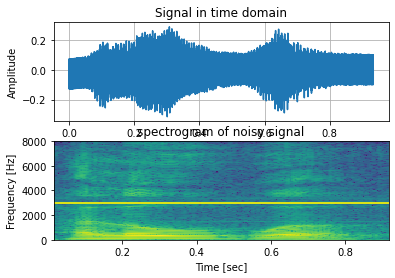

In [24]:
# Load the sound file
ipnoisyfilename = 'helloworld_noisy_16bit.wav'
_, sampleX_16bit = read_sound(ipnoisyfilename)
x = fnNormalize16BitToFloat(sampleX_16bit)
    
[f, t, Sxx] = signal.spectrogram(x, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
_, ax = plt.subplots(2, 1)
t1 = np.arange(0, len(x), 1) * (1 / 16000)

ax[0].plot(t1, x)
ax[0].grid()
ax[0].set_title('Signal in time domain')
ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Amplitude')
ax[1].pcolormesh(t, f, 10*np.log10(Sxx))
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
ax[1].set_title('spectrogram of noisy signal')

plt.show()

## Question 5c

In [27]:
ipnoisyfilename = 'helloworld_noisy_16bit.wav'
_, sampleX_16bit = read_sound(ipnoisyfilename)
    #Convert to float
x = fnNormalize16BitToFloat(sampleX_16bit)
    
    #Output should be same size as input
y = np.zeros(len(x), dtype=float)

    #Filter coeff
B = [1, -0.7653668, 0.99999]
A = [1, -0.722744, 0.888622]

    #Loop through input x axis space (and not the output one just in case)
    #Assume system is relax at n < 0
for n in range(len(x)):
    if n == 0:
            #Only input, only output, the rest of the term are all 0 
        y[n] = 1 * x[n]
    elif n == 1:
            #Only input at n=1, output at n=0 (in delayed term), input at n=0(in delayed term)
        y[n] = 1 * x[n] + (-0.7653668) * x[n - 1] - (-0.722744) * y[n - 1]
    else:
            #Should have all the necessary input, input delayed once and delayed twice
            #Should calculate based on delayed output once and twice
        y[n] = 1 * x[n] + (-0.7653668) * x[n - 1] + 0.99999 * x[n - 2] - (-0.722744) * y[n - 1] - 0.888622 * y[n - 2]
    
    #For comparison
y_ifil = signal.lfilter(B, A, x)
print(len(y_ifil))
print(len(y))

    #Check
for i in range(len(y)):
    if y[i] == y_ifil[i]:
        print("Very Good!")
        continue
    else:
        print("=========WARN========")
        print("Ours: ",y[i])
        print("IFIL: ",y_ifil[i])
        print("=====================")

14933
14933
Very Good!
=========WARN========
Ours:  0.006911702688680688
IFIL:  0.006911702688680686
=========WARN========
Ours:  -0.09215922417887118
IFIL:  -0.0921592241788712
=========WARN========
Ours:  -0.10743131383114853
IFIL:  -0.10743131383114854
=========WARN========
Ours:  -0.029433291071460463
IFIL:  -0.029433291071460466
=========WARN========
Ours:  0.04013044573567381
IFIL:  0.04013044573567382
=========WARN========
Ours:  0.020832133125709605
IFIL:  0.02083213312570962
=========WARN========
Ours:  -0.05467196411668359
IFIL:  -0.0546719641166836
=========WARN========
Ours:  -0.09249903492134295
IFIL:  -0.09249903492134297
=========WARN========
Ours:  -0.053228154064816485
IFIL:  -0.0532281540648165
=========WARN========
Ours:  0.009079125612814196
IFIL:  0.009079125612814203
=========WARN========
Ours:  0.017988021349121558
IFIL:  0.01798802134912158
=========WARN========
Ours:  -0.030932185749617116
IFIL:  -0.030932185749617102
Very Good!
=========WARN========
Ours:  -0.

IFIL:  -0.030552627114826328
=========WARN========
Ours:  -0.028811011520969463
IFIL:  -0.028811011520969473
=========WARN========
Ours:  -0.02750402883439008
IFIL:  -0.027504028834390057
=========WARN========
Ours:  -0.026599079264212202
IFIL:  -0.026599079264212174
=========WARN========
Ours:  -0.02571364680328797
IFIL:  -0.025713646803287984
=========WARN========
Ours:  -0.025541556189673013
IFIL:  -0.02554155618967304
=========WARN========
Ours:  -0.0250846924182145
IFIL:  -0.02508469241821451
=========WARN========
Ours:  -0.024372475569603477
IFIL:  -0.024372475569603466
=========WARN========
Ours:  -0.024468526909796392
IFIL:  -0.024468526909796375
=========WARN========
Ours:  -0.02463834654118289
IFIL:  -0.02463834654118288
=========WARN========
Ours:  -0.024250678513506513
IFIL:  -0.024250678513506527
=========WARN========
Ours:  -0.024267617158124786
IFIL:  -0.02426761715812481
=========WARN========
Ours:  -0.024779036539688246
IFIL:  -0.024779036539688257
=========WARN=======

=========WARN========
Ours:  -0.02296518716553454
IFIL:  -0.02296518716553455
=========WARN========
Ours:  -0.021300683098884988
IFIL:  -0.021300683098884984
Very Good!
=========WARN========
Ours:  -0.01859532389489087
IFIL:  -0.018595323894890887
=========WARN========
Ours:  -0.017599602576894934
IFIL:  -0.01759960257689494
=========WARN========
Ours:  -0.017262024523974448
IFIL:  -0.01726202452397444
=========WARN========
Ours:  -0.01711397933427023
IFIL:  -0.017113979334270217
=========WARN========
Ours:  -0.018218831937048045
IFIL:  -0.018218831937048027
Very Good!
=========WARN========
Ours:  -0.01946245533087806
IFIL:  -0.019462455330878085
=========WARN========
Ours:  -0.019934060982056228
IFIL:  -0.019934060982056245
=========WARN========
Ours:  -0.02201055333021044
IFIL:  -0.02201055333021043
=========WARN========
Ours:  -0.02336234488956108
IFIL:  -0.023362344889561057
=========WARN========
Ours:  -0.022912600467279626
IFIL:  -0.022912600467279623
=========WARN========
Ours: 

Ours:  -0.01863065467948653
IFIL:  -0.018630654679486523
Very Good!
=========WARN========
Ours:  -0.019752439576261525
IFIL:  -0.019752439576261535
=========WARN========
Ours:  -0.017632401783830885
IFIL:  -0.017632401783830895
=========WARN========
Ours:  -0.014698195381883761
IFIL:  -0.014698195381883758
=========WARN========
Ours:  -0.013927685524571902
IFIL:  -0.013927685524571881
=========WARN========
Ours:  -0.01367258838358955
IFIL:  -0.013672588383589555
=========WARN========
Ours:  -0.014049986695084548
IFIL:  -0.014049986695084588
=========WARN========
Ours:  -0.013250412183414833
IFIL:  -0.01325041218341487
=========WARN========
Ours:  -0.012508382009107305
IFIL:  -0.012508382009107297
=========WARN========
Ours:  -0.016410917824260525
IFIL:  -0.01641091782426049
=========WARN========
Ours:  -0.018189134843742353
IFIL:  -0.01818913484374233
=========WARN========
Ours:  -0.02092970961007594
IFIL:  -0.020929709610075967
=========WARN========
Ours:  -0.023030884397581972
IFIL: 

Ours:  -0.024022756512833917
IFIL:  -0.02402275651283392
=========WARN========
Ours:  -0.022533728511482345
IFIL:  -0.02253372851148236
Very Good!
=========WARN========
Ours:  -0.018345764748664936
IFIL:  -0.018345764748664922
=========WARN========
Ours:  -0.018712845928970576
IFIL:  -0.018712845928970573
=========WARN========
Ours:  -0.025114802627464763
IFIL:  -0.025114802627464773
=========WARN========
Ours:  -0.0278916615992284
IFIL:  -0.027891661599228415
Very Good!
=========WARN========
Ours:  -0.03679869897938967
IFIL:  -0.036798698979389664
=========WARN========
Ours:  -0.0356431526196717
IFIL:  -0.035643152619671686
=========WARN========
Ours:  -0.03601333179447677
IFIL:  -0.036013331794476765
=========WARN========
Ours:  -0.03729048431871995
IFIL:  -0.03729048431871997
=========WARN========
Ours:  -0.03391108302468165
IFIL:  -0.03391108302468167
=========WARN========
Ours:  -0.03413910109625012
IFIL:  -0.03413910109625011
=========WARN========
Ours:  -0.034094496893253
IFIL: 

Ours:  -0.005840447007637548
IFIL:  -0.005840447007637556
=========WARN========
Ours:  -0.0044376083803165135
IFIL:  -0.004437608380316538
=========WARN========
Ours:  -0.005124584356453174
IFIL:  -0.005124584356453188
=========WARN========
Ours:  -0.004534483727830452
IFIL:  -0.004534483727830441
=========WARN========
Ours:  -0.005554225272669101
IFIL:  -0.005554225272669075
=========WARN========
Ours:  -0.008396393797454754
IFIL:  -0.008396393797454743
=========WARN========
Ours:  -0.008615243915014194
IFIL:  -0.008615243915014205
=========WARN========
Ours:  -0.012134937565033555
IFIL:  -0.012134937565033574
=========WARN========
Ours:  -0.016551594427525556
IFIL:  -0.01655159442752556
=========WARN========
Ours:  -0.01720508783398421
IFIL:  -0.017205087833984195
=========WARN========
Ours:  -0.016874830149999687
IFIL:  -0.01687483014999968
=========WARN========
Ours:  -0.016435453540427077
IFIL:  -0.01643545354042708
=========WARN========
Ours:  -0.015366224151226727
IFIL:  -0.0153

=========WARN========
Ours:  -0.03833932417746157
IFIL:  -0.03833932417746158
=========WARN========
Ours:  -0.03657542893933891
IFIL:  -0.03657542893933889
=========WARN========
Ours:  -0.04131487749679891
IFIL:  -0.04131487749679887
Very Good!
=========WARN========
Ours:  -0.02706306021118058
IFIL:  -0.027063060211180615
=========WARN========
Ours:  -0.024145856025291366
IFIL:  -0.0241458560252914
=========WARN========
Ours:  -0.01211884633186587
IFIL:  -0.012118846331865864
=========WARN========
Ours:  0.0043628795586908575
IFIL:  0.004362879558690885
=========WARN========
Ours:  0.005756674517813325
IFIL:  0.005756674517813344
=========WARN========
Ours:  0.00719582736133618
IFIL:  0.007195827361336185
=========WARN========
Ours:  0.006387019162721914
IFIL:  0.006387019162721913
=========WARN========
Ours:  0.004753046008335014
IFIL:  0.0047530460083350145
=========WARN========
Ours:  -0.00021033791709333498
IFIL:  -0.0002103379170933367
=========WARN========
Ours:  -0.0051383444941

Ours:  -0.10398107924614376
IFIL:  -0.10398107924614373
=========WARN========
Ours:  -0.09867728336371931
IFIL:  -0.09867728336371928
Very Good!
=========WARN========
Ours:  -0.09112464458688113
IFIL:  -0.09112464458688115
=========WARN========
Ours:  -0.07697611083358061
IFIL:  -0.07697611083358064
Very Good!
=========WARN========
Ours:  -0.050910181351570744
IFIL:  -0.05091018135157073
=========WARN========
Ours:  -0.04109946079958603
IFIL:  -0.04109946079958602
Very Good!
=========WARN========
Ours:  -0.01397390787494715
IFIL:  -0.013973907874947164
=========WARN========
Ours:  0.006684030984564011
IFIL:  0.006684030984564007
=========WARN========
Ours:  0.018460217446313928
IFIL:  0.018460217446313935
=========WARN========
Ours:  0.022469167593125124
IFIL:  0.02246916759312513
=========WARN========
Ours:  0.026701167264009017
IFIL:  0.02670116726400902
=========WARN========
Ours:  0.027581780753848612
IFIL:  0.027581780753848616
=========WARN========
Ours:  0.027547715996505316
IFI

=========WARN========
Ours:  0.07992767012967152
IFIL:  0.07992767012967147
=========WARN========
Ours:  0.08823541456266358
IFIL:  0.08823541456266357
=========WARN========
Ours:  0.09218772061078577
IFIL:  0.09218772061078578
=========WARN========
Ours:  0.09726954628536522
IFIL:  0.09726954628536524
=========WARN========
Ours:  0.10230636163648944
IFIL:  0.10230636163648943
=========WARN========
Ours:  0.09467502068466231
IFIL:  0.09467502068466227
Very Good!
=========WARN========
Ours:  0.07739523412311014
IFIL:  0.07739523412311018
=========WARN========
Ours:  0.06772799884720787
IFIL:  0.0677279988472079
=========WARN========
Ours:  0.05755923122735139
IFIL:  0.057559231227351376
=========WARN========
Ours:  0.059107731257856705
IFIL:  0.05910773125785666
=========WARN========
Ours:  0.051496302324474455
IFIL:  0.05149630232447444
=========WARN========
Ours:  0.049584848251563
IFIL:  0.049584848251563035
=========WARN========
Ours:  0.056160019952780964
IFIL:  0.05616001995278100

Ours:  0.03990479864798698
IFIL:  0.03990479864798696
=========WARN========
Ours:  0.043379327367030145
IFIL:  0.043379327367030124
Very Good!
=========WARN========
Ours:  0.03707555164876253
IFIL:  0.03707555164876254
=========WARN========
Ours:  0.03260703178459858
IFIL:  0.032607031784598596
=========WARN========
Ours:  0.03836769020607031
IFIL:  0.03836769020607032
Very Good!
=========WARN========
Ours:  0.04171464881450256
IFIL:  0.04171464881450254
=========WARN========
Ours:  0.04790071653639729
IFIL:  0.04790071653639727
Very Good!
=========WARN========
Ours:  0.059126908832695266
IFIL:  0.059126908832695294
=========WARN========
Ours:  0.060170749853246684
IFIL:  0.06017074985324672
=========WARN========
Ours:  0.056069173246764116
IFIL:  0.056069173246764095
=========WARN========
Ours:  0.05950313678700299
IFIL:  0.05950313678700293
=========WARN========
Ours:  0.06010985672944856
IFIL:  0.06010985672944852
=========WARN========
Ours:  0.06320052303505251
IFIL:  0.06320052303

Ours:  -0.012821266292057883
IFIL:  -0.01282126629205789
=========WARN========
Ours:  -0.010142696616407244
IFIL:  -0.010142696616407265
=========WARN========
Ours:  -0.016960967235739175
IFIL:  -0.016960967235739182
=========WARN========
Ours:  -0.022351482764297208
IFIL:  -0.0223514827642972
=========WARN========
Ours:  -0.02484409334066979
IFIL:  -0.02484409334066978
=========WARN========
Ours:  -0.024451690869947574
IFIL:  -0.02445169086994757
=========WARN========
Ours:  -0.02509465859592083
IFIL:  -0.02509465859592082
Very Good!
=========WARN========
Ours:  -0.018628491191007547
IFIL:  -0.01862849119100756
=========WARN========
Ours:  -0.013242537797339377
IFIL:  -0.013242537797339388
=========WARN========
Ours:  -0.010022717831541725
IFIL:  -0.010022717831541723
=========WARN========
Ours:  -0.0023281602258001747
IFIL:  -0.002328160225800166
=========WARN========
Ours:  5.1487253110915274e-05
IFIL:  5.148725311092395e-05
=========WARN========
Ours:  0.0047451547040294716
IFIL:  

Ours:  -0.08591416026864969
IFIL:  -0.08591416026864966
=========WARN========
Ours:  -0.08162202999518775
IFIL:  -0.08162202999518772
=========WARN========
Ours:  -0.07539291157052223
IFIL:  -0.07539291157052225
=========WARN========
Ours:  -0.06815575325394616
IFIL:  -0.06815575325394618
=========WARN========
Ours:  -0.06499218923314877
IFIL:  -0.06499218923314876
=========WARN========
Ours:  -0.0608437008915724
IFIL:  -0.06084370089157237
=========WARN========
Ours:  -0.05650652227540493
IFIL:  -0.0565065222754049
Very Good!
=========WARN========
Ours:  -0.06022080913867205
IFIL:  -0.06022080913867209
=========WARN========
Ours:  -0.047531520195866574
IFIL:  -0.04753152019586661
Very Good!
=========WARN========
Ours:  -0.03742875259556111
IFIL:  -0.03742875259556108
=========WARN========
Ours:  -0.03060926037970542
IFIL:  -0.03060926037970539
=========WARN========
Ours:  -0.01780070791787145
IFIL:  -0.017800707917871455
=========WARN========
Ours:  -0.011834232953743855
IFIL:  -0.011

Ours:  -0.023500944964654873
IFIL:  -0.02350094496465491
=========WARN========
Ours:  -0.011721071688566578
IFIL:  -0.011721071688566592
=========WARN========
Ours:  -0.003384460387008608
IFIL:  -0.0033844603870085838
=========WARN========
Ours:  0.0010840099813318495
IFIL:  0.0010840099813318668
=========WARN========
Ours:  0.010567858307945207
IFIL:  0.010567858307945224
Very Good!
=========WARN========
Ours:  0.00773484708903518
IFIL:  0.007734847089035171
=========WARN========
Ours:  0.012815785150246296
IFIL:  0.012815785150246284
Very Good!
=========WARN========
Ours:  0.015487570057723752
IFIL:  0.015487570057723762
=========WARN========
Ours:  0.016484896388282873
IFIL:  0.016484896388282877
Very Good!
=========WARN========
Ours:  0.022466263231606522
IFIL:  0.022466263231606512
=========WARN========
Ours:  0.023384464155450306
IFIL:  0.023384464155450296
=========WARN========
Ours:  0.022280622148390362
IFIL:  0.022280622148390355
=========WARN========
Ours:  0.019937859379146

IFIL:  -0.05629165755177173
=========WARN========
Ours:  -0.06574055260833193
IFIL:  -0.06574055260833192
=========WARN========
Ours:  -0.07649870272570639
IFIL:  -0.07649870272570633
=========WARN========
Ours:  -0.08210453846610787
IFIL:  -0.08210453846610784
=========WARN========
Ours:  -0.08522668098518198
IFIL:  -0.08522668098518202
=========WARN========
Ours:  -0.09043538633122447
IFIL:  -0.09043538633122453
=========WARN========
Ours:  -0.08881825349277513
IFIL:  -0.08881825349277514
=========WARN========
Ours:  -0.0839564226254127
IFIL:  -0.08395642262541265
=========WARN========
Ours:  -0.08021593551336481
IFIL:  -0.08021593551336476
=========WARN========
Ours:  -0.07914696645463788
IFIL:  -0.0791469664546379
=========WARN========
Ours:  -0.07515876267967798
IFIL:  -0.07515876267967803
=========WARN========
Ours:  -0.07169271512788397
IFIL:  -0.071692715127884
=========WARN========
Ours:  -0.07328051476706432
IFIL:  -0.0732805147670643
=========WARN========
Ours:  -0.073025885

IFIL:  -0.036950974745081216
=========WARN========
Ours:  -0.013416180569361745
IFIL:  -0.013416180569361724
=========WARN========
Ours:  0.017415848768733797
IFIL:  0.017415848768733783
=========WARN========
Ours:  0.04462722244894776
IFIL:  0.044627222448947734
=========WARN========
Ours:  0.0602075855783067
IFIL:  0.060207585578306695
Very Good!
=========WARN========
Ours:  0.0844861067137718
IFIL:  0.08448610671377181
=========WARN========
Ours:  0.08818484580350132
IFIL:  0.08818484580350133
=========WARN========
Ours:  0.08505541255070934
IFIL:  0.08505541255070932
Very Good!
Very Good!
Very Good!
=========WARN========
Ours:  0.05310373889051001
IFIL:  0.05310373889051002
=========WARN========
Ours:  0.037649997307708766
IFIL:  0.03764999730770878
=========WARN========
Ours:  0.019681428588208892
IFIL:  0.019681428588208885
=========WARN========
Ours:  -0.00010240917040613834
IFIL:  -0.00010240917040615308
Very Good!
=========WARN========
Ours:  -0.04619695820207461
IFIL:  -0.046

Ours:  0.11100606224338203
IFIL:  0.11100606224338208
=========WARN========
Ours:  0.09714166302788248
IFIL:  0.09714166302788245
=========WARN========
Ours:  0.08800223365764939
IFIL:  0.08800223365764931
=========WARN========
Ours:  0.08262628543048846
IFIL:  0.0826262854304884
=========WARN========
Ours:  0.06472416603639787
IFIL:  0.06472416603639791
=========WARN========
Ours:  0.028051600828774184
IFIL:  0.028051600828774267
=========WARN========
Ours:  -0.005723693955833296
IFIL:  -0.0057236939558332894
=========WARN========
Ours:  -0.04157984264636101
IFIL:  -0.04157984264636107
=========WARN========
Ours:  -0.06913408290943245
IFIL:  -0.06913408290943249
=========WARN========
Ours:  -0.0883198740942022
IFIL:  -0.08831987409420215
=========WARN========
Ours:  -0.126035760454226
IFIL:  -0.12603576045422593
Very Good!
=========WARN========
Ours:  -0.1546732120287409
IFIL:  -0.154673212028741
=========WARN========
Ours:  -0.17259308419142091
IFIL:  -0.172593084191421
=========WARN

IFIL:  -0.0692036019650221
Very Good!
=========WARN========
Ours:  -0.08794555079365798
IFIL:  -0.08794555079365796
=========WARN========
Ours:  -0.1100824195969141
IFIL:  -0.11008241959691409
=========WARN========
Ours:  -0.13621049693168943
IFIL:  -0.13621049693168946
Very Good!
Very Good!
Very Good!
Very Good!
=========WARN========
Ours:  -0.14927718192777803
IFIL:  -0.149277181927778
=========WARN========
Ours:  -0.1324728616892348
IFIL:  -0.13247286168923478
Very Good!
=========WARN========
Ours:  -0.09479961013451255
IFIL:  -0.09479961013451256
=========WARN========
Ours:  -0.055867963592933
IFIL:  -0.05586796359293301
=========WARN========
Ours:  -0.01635555247733815
IFIL:  -0.016355552477338137
=========WARN========
Ours:  0.0036503840656024883
IFIL:  0.0036503840656025117
Very Good!
=========WARN========
Ours:  0.04433309117778049
IFIL:  0.044333091177780476
=========WARN========
Ours:  0.0652457311427002
IFIL:  0.06524573114270019
=========WARN========
Ours:  0.07161562897315

=========WARN========
Ours:  -0.012810812007480125
IFIL:  -0.01281081200748014
=========WARN========
Ours:  0.001547190413750355
IFIL:  0.0015471904137503711
=========WARN========
Ours:  0.017791946631705215
IFIL:  0.017791946631705247
=========WARN========
Ours:  0.013281155755352138
IFIL:  0.013281155755352145
=========WARN========
Ours:  0.01922466945981032
IFIL:  0.019224669459810287
=========WARN========
Ours:  0.04845150775267442
IFIL:  0.048451507752674386
=========WARN========
Ours:  0.0877080200681581
IFIL:  0.08770802006815812
=========WARN========
Ours:  0.11249820270145991
IFIL:  0.11249820270145997
=========WARN========
Ours:  0.1272025352171726
IFIL:  0.12720253521717262
=========WARN========
Ours:  0.15613811713613432
IFIL:  0.1561381171361343
=========WARN========
Ours:  0.17926811660660227
IFIL:  0.17926811660660225
=========WARN========
Ours:  0.19231955597729739
IFIL:  0.19231955597729736
Very Good!
=========WARN========
Ours:  0.16566875728744526
IFIL:  0.1656687572

Ours:  -0.08163389306950597
IFIL:  -0.08163389306950598
=========WARN========
Ours:  -0.10509767605203771
IFIL:  -0.10509767605203774
Very Good!
Very Good!
=========WARN========
Ours:  -0.1464964605611953
IFIL:  -0.14649646056119536
=========WARN========
Ours:  -0.13913387026120408
IFIL:  -0.1391338702612041
=========WARN========
Ours:  -0.1307280759611839
IFIL:  -0.13072807596118385
=========WARN========
Ours:  -0.12133222579865706
IFIL:  -0.12133222579865702
Very Good!
=========WARN========
Ours:  -0.10074516034790139
IFIL:  -0.10074516034790143
=========WARN========
Ours:  -0.08503569057219339
IFIL:  -0.08503569057219341
=========WARN========
Ours:  -0.0851244101416763
IFIL:  -0.08512441014167627
=========WARN========
Ours:  -0.0821402606384026
IFIL:  -0.08214026063840257
=========WARN========
Ours:  -0.07126916032127213
IFIL:  -0.07126916032127215
=========WARN========
Ours:  -0.07009762803528179
IFIL:  -0.07009762803528184
=========WARN========
Ours:  -0.07105015779462252
IFIL:  -

=========WARN========
Ours:  0.10747772731755174
IFIL:  0.1074777273175518
=========WARN========
Ours:  0.09045903625138711
IFIL:  0.09045903625138715
=========WARN========
Ours:  0.08451678918918051
IFIL:  0.0845167891891805
=========WARN========
Ours:  0.039911317188363604
IFIL:  0.039911317188363556
=========WARN========
Ours:  0.013385677482025168
IFIL:  0.013385677482025148
=========WARN========
Ours:  -0.023178055195748875
IFIL:  -0.023178055195748844
=========WARN========
Ours:  -0.05757911479330791
IFIL:  -0.057579114793307865
=========WARN========
Ours:  -0.10784708258582444
IFIL:  -0.10784708258582441
Very Good!
=========WARN========
Ours:  -0.1842877431604918
IFIL:  -0.18428774316049182
=========WARN========
Ours:  -0.20385097189011905
IFIL:  -0.20385097189011908
=========WARN========
Ours:  -0.23134543588519357
IFIL:  -0.23134543588519355
=========WARN========
Ours:  -0.24222940253694544
IFIL:  -0.24222940253694536
=========WARN========
Ours:  -0.24100348924076423
IFIL:  -0

IFIL:  0.10713683049408364
=========WARN========
Ours:  0.066207996601714
IFIL:  0.06620799660171403
=========WARN========
Ours:  0.03001362056787471
IFIL:  0.030013620567874766
=========WARN========
Ours:  -0.0053679165794340775
IFIL:  -0.00536791657943405
=========WARN========
Ours:  -0.05997600208223863
IFIL:  -0.05997600208223869
=========WARN========
Ours:  -0.10398231195384151
IFIL:  -0.1039823119538416
=========WARN========
Ours:  -0.13888420043223576
IFIL:  -0.13888420043223582
=========WARN========
Ours:  -0.16840398584594676
IFIL:  -0.16840398584594674
=========WARN========
Ours:  -0.19358443174257323
IFIL:  -0.19358443174257317
=========WARN========
Ours:  -0.2157777765729051
IFIL:  -0.21577777657290506
=========WARN========
Ours:  -0.22782549168669336
IFIL:  -0.22782549168669342
=========WARN========
Ours:  -0.22089797079957488
IFIL:  -0.22089797079957493
=========WARN========
Ours:  -0.21901360974910458
IFIL:  -0.21901360974910453
=========WARN========
Ours:  -0.2111309473

=========WARN========
Ours:  -0.08222267711061003
IFIL:  -0.08222267711060999
=========WARN========
Ours:  -0.06500758110959205
IFIL:  -0.06500758110959204
=========WARN========
Ours:  -0.04834757295399361
IFIL:  -0.048347572953993626
=========WARN========
Ours:  -0.03277557442127906
IFIL:  -0.03277557442127908
=========WARN========
Ours:  -0.009745416605095474
IFIL:  -0.00974541660509548
=========WARN========
Ours:  0.012171156991441043
IFIL:  0.012171156991441064
=========WARN========
Ours:  0.030543026030748176
IFIL:  0.030543026030748197
=========WARN========
Ours:  0.04324340546677073
IFIL:  0.04324340546677072
=========WARN========
Ours:  0.06271477760742597
IFIL:  0.06271477760742596
Very Good!
=========WARN========
Ours:  0.08411591172101385
IFIL:  0.08411591172101388
=========WARN========
Ours:  0.08889160482356741
IFIL:  0.08889160482356742
=========WARN========
Ours:  0.09262513129252567
IFIL:  0.09262513129252564
Very Good!
=========WARN========
Ours:  0.09095104794872415
I

IFIL:  -0.10442930055258892
=========WARN========
Ours:  -0.1078024769539059
IFIL:  -0.10780247695390589
=========WARN========
Ours:  -0.10231589304974636
IFIL:  -0.10231589304974634
=========WARN========
Ours:  -0.10512665433804638
IFIL:  -0.10512665433804641
=========WARN========
Ours:  -0.10914456775491561
IFIL:  -0.10914456775491566
Very Good!
=========WARN========
Ours:  -0.09570063008116883
IFIL:  -0.09570063008116879
Very Good!
=========WARN========
Ours:  -0.08015329265396649
IFIL:  -0.08015329265396653
=========WARN========
Ours:  -0.06573523871474697
IFIL:  -0.065735238714747
=========WARN========
Ours:  -0.05218094726822341
IFIL:  -0.05218094726822338
=========WARN========
Ours:  -0.0376715298407771
IFIL:  -0.03767152984077708
Very Good!
=========WARN========
Ours:  -0.0023590448355246887
IFIL:  -0.0023590448355247096
=========WARN========
Ours:  0.017216871888250437
IFIL:  0.017216871888250426
=========WARN========
Ours:  0.03286955415184592
IFIL:  0.03286955415184593
=====

IFIL:  0.034398593284096786
Very Good!
=========WARN========
Ours:  -0.0011039373690272004
IFIL:  -0.001103937369027197
=========WARN========
Ours:  -0.020818715417778577
IFIL:  -0.02081871541777858
Very Good!
=========WARN========
Ours:  -0.04757651622001881
IFIL:  -0.047576516220018794
=========WARN========
Ours:  -0.0616051981696892
IFIL:  -0.06160519816968917
Very Good!
=========WARN========
Ours:  -0.07637909142218952
IFIL:  -0.07637909142218954
=========WARN========
Ours:  -0.08197463413686898
IFIL:  -0.081974634136869
=========WARN========
Ours:  -0.08378345082170263
IFIL:  -0.08378345082170262
=========WARN========
Ours:  -0.08845033206597926
IFIL:  -0.08845033206597921
=========WARN========
Ours:  -0.08365915296704847
IFIL:  -0.08365915296704846
=========WARN========
Ours:  -0.0828386560762104
IFIL:  -0.08283865607621042
=========WARN========
Ours:  -0.08362015396599305
IFIL:  -0.0836201539659931
Very Good!
=========WARN========
Ours:  -0.08186233132585366
IFIL:  -0.0818623313

IFIL:  -0.07884106027024326
=========WARN========
Ours:  -0.08253740618504594
IFIL:  -0.08253740618504597
=========WARN========
Ours:  -0.08523493272913532
IFIL:  -0.08523493272913535
=========WARN========
Ours:  -0.08295303690581661
IFIL:  -0.0829530369058166
=========WARN========
Ours:  -0.07611960176318237
IFIL:  -0.07611960176318233
Very Good!
=========WARN========
Ours:  -0.056785630732563985
IFIL:  -0.05678563073256403
=========WARN========
Ours:  -0.05457236058951631
IFIL:  -0.05457236058951634
=========WARN========
Ours:  -0.0426188471222438
IFIL:  -0.04261884712224378
=========WARN========
Ours:  -0.0333482475201102
IFIL:  -0.03334824752011016
=========WARN========
Ours:  -0.028586649101605056
IFIL:  -0.028586649101605043
=========WARN========
Ours:  -0.019259189644890793
IFIL:  -0.019259189644890817
=========WARN========
Ours:  -0.01714526262424441
IFIL:  -0.017145262624244442
=========WARN========
Ours:  -0.01200929539196385
IFIL:  -0.012009295391963867
=========WARN========

IFIL:  0.04653038141136994
=========WARN========
Ours:  0.044932377281611154
IFIL:  0.04493237728161116
=========WARN========
Ours:  0.04182374552539455
IFIL:  0.04182374552539456
=========WARN========
Ours:  0.038782792860679004
IFIL:  0.03878279286067901
=========WARN========
Ours:  0.030145982041623547
IFIL:  0.030145982041623554
=========WARN========
Ours:  0.022996871158393634
IFIL:  0.02299687115839362
=========WARN========
Ours:  0.014061660824282875
IFIL:  0.014061660824282854
=========WARN========
Ours:  0.006247603961205186
IFIL:  0.006247603961205189
=========WARN========
Ours:  -0.0061281315341627255
IFIL:  -0.006128131534162702
=========WARN========
Ours:  -0.017904637749775316
IFIL:  -0.0179046377497753
=========WARN========
Ours:  -0.02754977029465264
IFIL:  -0.02754977029465265
=========WARN========
Ours:  -0.039862557278296525
IFIL:  -0.03986255727829655
Very Good!
=========WARN========
Ours:  -0.0600713555272751
IFIL:  -0.060071355527275064
=========WARN========
Ours:

Ours:  0.005236110999258292
IFIL:  0.005236110999258303
=========WARN========
Ours:  0.005146936652450547
IFIL:  0.005146936652450543
=========WARN========
Ours:  0.009879976277812964
IFIL:  0.009879976277812952
=========WARN========
Ours:  0.011756724472509718
IFIL:  0.011756724472509725
=========WARN========
Ours:  0.015785068039111602
IFIL:  0.015785068039111616
=========WARN========
Ours:  0.022305139608986807
IFIL:  0.022305139608986814
=========WARN========
Ours:  0.02395331316002729
IFIL:  0.023953313160027273
=========WARN========
Ours:  0.029705618222115853
IFIL:  0.029705618222115843
=========WARN========
Ours:  0.030522009059600258
IFIL:  0.030522009059600272
=========WARN========
Ours:  0.03738594287306243
IFIL:  0.03738594287306247
=========WARN========
Ours:  0.038984274659381146
IFIL:  0.03898427465938116
=========WARN========
Ours:  0.0385259705209129
IFIL:  0.038525970520912875
=========WARN========
Ours:  0.03834760493019067
IFIL:  0.03834760493019064
Very Good!
=====

=========WARN========
Ours:  -0.057449296206066515
IFIL:  -0.057449296206066494
=========WARN========
Ours:  -0.05903707034301014
IFIL:  -0.059037070343010145
=========WARN========
Ours:  -0.05973176159417409
IFIL:  -0.059731761594174114
=========WARN========
Ours:  -0.05894697713487509
IFIL:  -0.058946977134875095
=========WARN========
Ours:  -0.05163663906486038
IFIL:  -0.051636639064860365
=========WARN========
Ours:  -0.04754071690595343
IFIL:  -0.047540716905953406
=========WARN========
Ours:  -0.03915482498283817
IFIL:  -0.039154824982838156
Very Good!
=========WARN========
Ours:  -0.02632310055420179
IFIL:  -0.026323100554201805
Very Good!
=========WARN========
Ours:  -0.01650400811486651
IFIL:  -0.016504008114866506
=========WARN========
Ours:  -0.012398377410406641
IFIL:  -0.012398377410406634
=========WARN========
Ours:  -0.010064604342998428
IFIL:  -0.010064604342998433
=========WARN========
Ours:  -0.0033252682024688725
IFIL:  -0.0033252682024688812
=========WARN========
Ou

IFIL:  -0.021242260037067293
=========WARN========
Ours:  -0.021871382361231363
IFIL:  -0.0218713823612314
=========WARN========
Ours:  -0.021018203182232163
IFIL:  -0.021018203182232215
=========WARN========
Ours:  -0.021942525579652077
IFIL:  -0.021942525579652088
=========WARN========
Ours:  -0.020165265900590413
IFIL:  -0.02016526590059038
=========WARN========
Ours:  -0.01847239193499904
IFIL:  -0.018472391934999013
=========WARN========
Ours:  -0.01626311270567268
IFIL:  -0.016263112705672676
=========WARN========
Ours:  -0.012037487489183974
IFIL:  -0.012037487489184012
=========WARN========
Ours:  -0.00922372633619015
IFIL:  -0.009223726336190181
=========WARN========
Ours:  -0.003960607510060643
IFIL:  -0.003960607510060624
=========WARN========
Ours:  -0.0020165803613759227
IFIL:  -0.0020165803613758776
=========WARN========
Ours:  0.004049824482810129
IFIL:  0.004049824482810141
=========WARN========
Ours:  0.0041373395928757375
IFIL:  0.004137339592875711
=========WARN=====

Ours:  0.013542309518670956
IFIL:  0.013542309518670921
=========WARN========
Ours:  0.014590411927791671
IFIL:  0.01459041192779166
=========WARN========
Ours:  0.014893479620723555
IFIL:  0.014893479620723585
=========WARN========
Ours:  0.015592979846496857
IFIL:  0.015592979846496885
=========WARN========
Ours:  0.015181049517911969
IFIL:  0.015181049517911965
=========WARN========
Ours:  0.017406436867712073
IFIL:  0.017406436867712052
=========WARN========
Ours:  0.016055555493694022
IFIL:  0.016055555493694015
=========WARN========
Ours:  0.016019956456632047
IFIL:  0.016019956456632053
=========WARN========
Ours:  0.0157106288406721
IFIL:  0.015710628840672113
=========WARN========
Ours:  0.014349669324271553
IFIL:  0.01434966932427155
=========WARN========
Ours:  0.012447303918556148
IFIL:  0.012447303918556127
=========WARN========
Ours:  0.008687952936989565
IFIL:  0.008687952936989547
=========WARN========
Ours:  0.008912971586375263
IFIL:  0.008912971586375273
=========WAR

IFIL:  0.015666417126235066
=========WARN========
Ours:  0.01597336399324263
IFIL:  0.015973363993242645
=========WARN========
Ours:  0.016386281517538015
IFIL:  0.01638628151753803
=========WARN========
Ours:  0.016935097798502666
IFIL:  0.016935097798502663
=========WARN========
Ours:  0.017426850915797175
IFIL:  0.01742685091579716
Very Good!
=========WARN========
Ours:  0.017543558224004937
IFIL:  0.017543558224004947
Very Good!
Very Good!
Very Good!
=========WARN========
Ours:  0.013762367648577838
IFIL:  0.013762367648577828
=========WARN========
Ours:  0.010948169671787562
IFIL:  0.010948169671787564
=========WARN========
Ours:  0.010254163044894345
IFIL:  0.010254163044894349
=========WARN========
Ours:  0.00920246907822298
IFIL:  0.009202469078222975
=========WARN========
Ours:  0.008177069199994101
IFIL:  0.008177069199994103
=========WARN========
Ours:  0.008716862459125585
IFIL:  0.00871686245912559
=========WARN========
Ours:  0.00766878516816592
IFIL:  0.00766878516816592

Ours:  -0.013536784240768818
IFIL:  -0.013536784240768832
=========WARN========
Ours:  -0.01234700788363008
IFIL:  -0.012347007883630093
=========WARN========
Ours:  -0.012748249478436106
IFIL:  -0.012748249478436103
=========WARN========
Ours:  -0.012370558365398562
IFIL:  -0.012370558365398535
=========WARN========
Ours:  -0.013558624604888037
IFIL:  -0.01355862460488802
=========WARN========
Ours:  -0.013107012310947453
IFIL:  -0.013107012310947463
=========WARN========
Ours:  -0.013381218653501175
IFIL:  -0.013381218653501198
=========WARN========
Ours:  -0.013033471782458922
IFIL:  -0.013033471782458924
=========WARN========
Ours:  -0.011104226536457148
IFIL:  -0.011104226536457124
=========WARN========
Ours:  -0.011164696116641039
IFIL:  -0.011164696116641025
Very Good!
=========WARN========
Ours:  -0.01058529368859021
IFIL:  -0.010585293688590222
=========WARN========
Ours:  -0.010683137796536964
IFIL:  -0.01068313779653697
=========WARN========
Ours:  -0.009297163175088495
IFIL

=========WARN========
Ours:  0.018500530263224957
IFIL:  0.018500530263224933
=========WARN========
Ours:  0.01875866805628703
IFIL:  0.018758668056287037
=========WARN========
Ours:  0.016443966532970828
IFIL:  0.016443966532970856
=========WARN========
Ours:  0.014939121118952136
IFIL:  0.014939121118952153
=========WARN========
Ours:  0.01342398495549131
IFIL:  0.013423984955491297
=========WARN========
Ours:  0.01121023934365681
IFIL:  0.011210239343656794
=========WARN========
Ours:  0.010699349234713485
IFIL:  0.010699349234713482
=========WARN========
Ours:  0.007674083215667201
IFIL:  0.0076740832156672045
=========WARN========
Ours:  0.0067899654682575614
IFIL:  0.006789965468257567
=========WARN========
Ours:  0.004256327774827302
IFIL:  0.004256327774827304
=========WARN========
Ours:  0.0024434728058150227
IFIL:  0.002443472805815021
=========WARN========
Ours:  -0.0001500213637017386
IFIL:  -0.00015002136370173558
=========WARN========
Ours:  -0.0013409803106755845
IFIL:  

Ours:  -0.0059750223414142024
IFIL:  -0.005975022341414171
=========WARN========
Ours:  -0.0034519143575348077
IFIL:  -0.0034519143575347843
=========WARN========
Ours:  -0.0020723715659106984
IFIL:  -0.0020723715659107106
=========WARN========
Ours:  -0.0002781284280019801
IFIL:  -0.0002781284280020113
=========WARN========
Ours:  0.0015607564705808557
IFIL:  0.0015607564705808485
=========WARN========
Ours:  0.002957927167840354
IFIL:  0.0029579271678403796
=========WARN========
Ours:  0.005859842388995829
IFIL:  0.005859842388995853
=========WARN========
Ours:  0.006066484080119238
IFIL:  0.006066484080119228
=========WARN========
Ours:  0.005370170879336111
IFIL:  0.005370170879336084
=========WARN========
Ours:  0.006348995849105017
IFIL:  0.006348995849105003
=========WARN========
Ours:  0.006181204327448086
IFIL:  0.006181204327448106
=========WARN========
Ours:  0.006982629296300164
IFIL:  0.006982629296300197
=========WARN========
Ours:  0.006885429120309995
IFIL:  0.006885429

Ours:  -0.002038271448954477
IFIL:  -0.002038271448954479
=========WARN========
Ours:  -0.003136851789615158
IFIL:  -0.003136851789615147
=========WARN========
Ours:  -0.002879334035166395
IFIL:  -0.002879334035166388
=========WARN========
Ours:  -0.0036103740616088534
IFIL:  -0.0036103740616088703
=========WARN========
Ours:  -0.0035116872489411636
IFIL:  -0.0035116872489411866
=========WARN========
Ours:  -0.004753662755638296
IFIL:  -0.004753662755638297
=========WARN========
Ours:  -0.0044095911756961495
IFIL:  -0.004409591175696129
=========WARN========
Ours:  -0.0046903245287418524
IFIL:  -0.004690324528741824
=========WARN========
Ours:  -0.004406339045206381
IFIL:  -0.004406339045206389
=========WARN========
Ours:  -0.003615644048956552
IFIL:  -0.00361564404895659
=========WARN========
Ours:  -0.004036016716792941
IFIL:  -0.004036016716792962
=========WARN========
Ours:  -0.0036336273468347176
IFIL:  -0.003633627346834714
=========WARN========
Ours:  -0.0032844860277775833
IFIL

IFIL:  0.003168183147852041
=========WARN========
Ours:  0.0019030618354633302
IFIL:  0.0019030618354633488
=========WARN========
Ours:  0.0007623736293286059
IFIL:  0.0007623736293286259
=========WARN========
Ours:  0.00033967162389178236
IFIL:  0.0003396716238917852
=========WARN========
Ours:  0.0002895615763848083
IFIL:  0.00028956157638479474
=========WARN========
Ours:  0.0008451659880850683
IFIL:  0.0008451659880850532
=========WARN========
Ours:  0.0011853089077679506
IFIL:  0.001185308907767954
=========WARN========
Ours:  0.0012411882811060797
IFIL:  0.001241188281106101
=========WARN========
Ours:  0.0016662854149150552
IFIL:  0.001666285414915064
=========WARN========
Ours:  0.0020072440513788374
IFIL:  0.002007244051378823
=========WARN========
Ours:  0.0015658098409684744
IFIL:  0.0015658098409684577
=========WARN========
Ours:  0.002771261373443113
IFIL:  0.002771261373443107
=========WARN========
Ours:  0.003765619090143833
IFIL:  0.0037656190901438347
=========WARN====

IFIL:  0.0015164780491890711
=========WARN========
Ours:  0.0012786273055679952
IFIL:  0.0012786273055680197
=========WARN========
Ours:  0.0015370167851764137
IFIL:  0.0015370167851764345
=========WARN========
Ours:  0.0020174266204724027
IFIL:  0.0020174266204723984
=========WARN========
Ours:  0.002125037585907739
IFIL:  0.0021250375859077214
=========WARN========
Ours:  0.0019312195782989437
IFIL:  0.0019312195782989344
=========WARN========
Ours:  0.0025011644416951338
IFIL:  0.002501164441695153
=========WARN========
Ours:  0.00323863964079697
IFIL:  0.0032386396407969933
=========WARN========
Ours:  0.002690894963098718
IFIL:  0.002690894963098711
=========WARN========
Ours:  0.002822218212957704
IFIL:  0.0028222182129576806
=========WARN========
Ours:  0.0030226270250148226
IFIL:  0.003022627025014822
=========WARN========
Ours:  0.0023829960658818187
IFIL:  0.00238299606588184
=========WARN========
Ours:  0.002486927185512087
IFIL:  0.0024869271855121056
=========WARN========


Ours:  0.004145175520286017
IFIL:  0.004145175520285989
=========WARN========
Ours:  0.0051389891579417275
IFIL:  0.005138989157941698
=========WARN========
Ours:  0.005373475365921775
IFIL:  0.0053734753659217815
=========WARN========
Ours:  0.0055152313387287315
IFIL:  0.005515231338728763
=========WARN========
Ours:  0.00488794578319272
IFIL:  0.004887945783192724
=========WARN========
Ours:  0.004049659013931024
IFIL:  0.004049659013931002
=========WARN========
Ours:  0.0033355659187351465
IFIL:  0.0033355659187351283
=========WARN========
Ours:  0.0014813576024444697
IFIL:  0.001481357602444472
=========WARN========
Ours:  -0.0003567949003638253
IFIL:  -0.0003567949003638049
=========WARN========
Ours:  -0.0018050469350876328
IFIL:  -0.001805046935087623
=========WARN========
Ours:  -0.0027293591394416997
IFIL:  -0.0027293591394417158
=========WARN========
Ours:  -0.003834350554569047
IFIL:  -0.0038343505545690715
=========WARN========
Ours:  -0.0035446119989575296
IFIL:  -0.00354

Ours:  -0.007653658953561233
IFIL:  -0.007653658953561224
=========WARN========
Ours:  -0.006717025406560927
IFIL:  -0.006717025406560925
=========WARN========
Ours:  -0.007022919043737169
IFIL:  -0.007022919043737183
=========WARN========
Ours:  -0.004695316725587224
IFIL:  -0.004695316725587234
=========WARN========
Ours:  -0.0033144857197024086
IFIL:  -0.0033144857197024077
=========WARN========
Ours:  -0.00032194620353265865
IFIL:  -0.0003219462035326526
=========WARN========
Ours:  0.0006073612115552454
IFIL:  0.0006073612115552601
=========WARN========
Ours:  0.0026301352130176404
IFIL:  0.0026301352130176483
=========WARN========
Ours:  0.005496279935498125
IFIL:  0.005496279935498116
=========WARN========
Ours:  0.0072991533879221485
IFIL:  0.007299153387922128
=========WARN========
Ours:  0.008347681170683487
IFIL:  0.008347681170683484
=========WARN========
Ours:  0.00951291950769156
IFIL:  0.009512919507691578
=========WARN========
Ours:  0.008956903079343565
IFIL:  0.008956

=========WARN========
Ours:  0.009181725962992233
IFIL:  0.009181725962992243
=========WARN========
Ours:  0.005982963641038671
IFIL:  0.005982963641038658
=========WARN========
Ours:  0.0033539298503779576
IFIL:  0.0033539298503779402
=========WARN========
Ours:  0.0019132761874695809
IFIL:  0.001913276187469573
=========WARN========
Ours:  -0.001942326572366911
IFIL:  -0.001942326572366898
=========WARN========
Ours:  -0.00363291954417355
IFIL:  -0.003632919544173538
=========WARN========
Ours:  -0.007148371268712612
IFIL:  -0.007148371268712608
Very Good!
=========WARN========
Ours:  -0.010603789353274076
IFIL:  -0.010603789353274065
=========WARN========
Ours:  -0.013001760011372314
IFIL:  -0.013001760011372317
=========WARN========
Ours:  -0.01590647169074063
IFIL:  -0.015906471690740637
Very Good!
=========WARN========
Ours:  -0.014909072715222965
IFIL:  -0.014909072715222946
=========WARN========
Ours:  -0.015906321082323253
IFIL:  -0.015906321082323233
Very Good!
=========WARN=

IFIL:  -0.0035156679852982597
=========WARN========
Ours:  0.0009189412296749704
IFIL:  0.000918941229674973
=========WARN========
Ours:  0.006593651968059962
IFIL:  0.0065936519680599714
=========WARN========
Ours:  0.010920510740317007
IFIL:  0.01092051074031701
=========WARN========
Ours:  0.015564708466823016
IFIL:  0.015564708466823014
=========WARN========
Ours:  0.018998670159470488
IFIL:  0.018998670159470474
=========WARN========
Ours:  0.02103791575912868
IFIL:  0.021037915759128667
=========WARN========
Ours:  0.024081703469911196
IFIL:  0.024081703469911203
=========WARN========
Ours:  0.02443253659465728
IFIL:  0.0244325365946573
=========WARN========
Ours:  0.02498371011458218
IFIL:  0.02498371011458219
=========WARN========
Ours:  0.024788757118207876
IFIL:  0.02478875711820787
=========WARN========
Ours:  0.024171320509744156
IFIL:  0.02417132050974414
=========WARN========
Ours:  0.023817037633384868
IFIL:  0.02381703763338487
=========WARN========
Ours:  0.02332981704

IFIL:  0.011820937744532849
=========WARN========
Ours:  0.0017118174924775909
IFIL:  0.0017118174924776325
=========WARN========
Ours:  -0.005852212537224782
IFIL:  -0.005852212537224777
=========WARN========
Ours:  -0.015044883255323504
IFIL:  -0.015044883255323535
=========WARN========
Ours:  -0.02168046087341205
IFIL:  -0.02168046087341207
=========WARN========
Ours:  -0.026522638905461186
IFIL:  -0.026522638905461172
=========WARN========
Ours:  -0.03043933819854079
IFIL:  -0.030439338198540777
=========WARN========
Ours:  -0.028409369421985343
IFIL:  -0.02840936942198534
=========WARN========
Ours:  -0.02930213690423712
IFIL:  -0.029302136904237143
=========WARN========
Ours:  -0.027253289414572064
IFIL:  -0.027253289414572085
=========WARN========
Ours:  -0.02046649895772224
IFIL:  -0.020466498957722228
=========WARN========
Ours:  -0.017298243133854856
IFIL:  -0.017298243133854835
=========WARN========
Ours:  -0.013855853824019475
IFIL:  -0.013855853824019465
=========WARN=====

Ours:  -0.03921869913585108
IFIL:  -0.039218699135851076
=========WARN========
Ours:  -0.04310208449166426
IFIL:  -0.043102084491664264
=========WARN========
Ours:  -0.042605139250414724
IFIL:  -0.04260513925041473
=========WARN========
Ours:  -0.0402740507672345
IFIL:  -0.04027405076723449
=========WARN========
Ours:  -0.03475387190357436
IFIL:  -0.034753871903574346
=========WARN========
Ours:  -0.02630160662976238
IFIL:  -0.026301606629762372
Very Good!
=========WARN========
Ours:  -0.005458583090776219
IFIL:  -0.005458583090776223
=========WARN========
Ours:  0.007561533109547276
IFIL:  0.007561533109547269
=========WARN========
Ours:  0.02183601638707863
IFIL:  0.021836016387078626
Very Good!
=========WARN========
Ours:  0.04992750303366776
IFIL:  0.049927503033667775
Very Good!
=========WARN========
Ours:  0.07381161558631041
IFIL:  0.0738116155863104
=========WARN========
Ours:  0.07833551483842371
IFIL:  0.07833551483842369
=========WARN========
Ours:  0.0816402888984016
IFIL: 

Ours:  0.0713149599468002
IFIL:  0.07131495994680018
=========WARN========
Ours:  0.06709017467479052
IFIL:  0.0670901746747905
=========WARN========
Ours:  0.05633587149709128
IFIL:  0.056335871497091294
=========WARN========
Ours:  0.04251330396338877
IFIL:  0.042513303963388795
=========WARN========
Ours:  0.025259558692325525
IFIL:  0.02525955869232553
=========WARN========
Ours:  0.0038145155698966274
IFIL:  0.0038145155698966066
=========WARN========
Ours:  -0.010306984036337813
IFIL:  -0.010306984036337827
=========WARN========
Ours:  -0.02508031169603358
IFIL:  -0.025080311696033572
=========WARN========
Ours:  -0.03812382977583351
IFIL:  -0.03812382977583349
Very Good!
=========WARN========
Ours:  -0.05153331458064689
IFIL:  -0.05153331458064691
=========WARN========
Ours:  -0.044672487840089495
IFIL:  -0.04467248784008953
=========WARN========
Ours:  -0.03934720202477209
IFIL:  -0.0393472020247721
=========WARN========
Ours:  -0.02634600735190886
IFIL:  -0.02634600735190884
=

IFIL:  0.11195901262207557
=========WARN========
Ours:  0.09904149989974594
IFIL:  0.09904149989974592
=========WARN========
Ours:  0.07237000396318549
IFIL:  0.07237000396318546
=========WARN========
Ours:  0.03412382576028011
IFIL:  0.0341238257602801
=========WARN========
Ours:  -0.0022354391386039257
IFIL:  -0.002235439138603891
=========WARN========
Ours:  -0.03032292872609206
IFIL:  -0.03032292872609202
Very Good!
=========WARN========
Ours:  -0.08520220435659283
IFIL:  -0.0852022043565929
=========WARN========
Ours:  -0.10705915686629791
IFIL:  -0.10705915686629797
=========WARN========
Ours:  -0.1181348569007382
IFIL:  -0.11813485690073819
=========WARN========
Ours:  -0.12176830289488569
IFIL:  -0.12176830289488563
Very Good!
=========WARN========
Ours:  -0.131182342086481
IFIL:  -0.13118234208648102
=========WARN========
Ours:  -0.12360031141349442
IFIL:  -0.12360031141349444
=========WARN========
Ours:  -0.12670099966484505
IFIL:  -0.126700999664845
=========WARN========
Our

=========WARN========
Ours:  -0.18610407824395417
IFIL:  -0.1861040782439541
=========WARN========
Ours:  -0.20162321766548283
IFIL:  -0.2016232176654828
=========WARN========
Ours:  -0.19278721246646496
IFIL:  -0.19278721246646502
=========WARN========
Ours:  -0.17277988414723422
IFIL:  -0.17277988414723428
=========WARN========
Ours:  -0.17146694411224392
IFIL:  -0.1714669441122439
Very Good!
=========WARN========
Ours:  -0.11521879101183705
IFIL:  -0.11521879101183703
Very Good!
=========WARN========
Ours:  -0.07040536748280002
IFIL:  -0.07040536748280003
=========WARN========
Ours:  -0.04701628912159721
IFIL:  -0.04701628912159722
Very Good!
=========WARN========
Ours:  0.0048101478352521945
IFIL:  0.0048101478352522015
=========WARN========
Ours:  0.011612325509435912
IFIL:  0.011612325509435917
=========WARN========
Ours:  0.030367736905948645
IFIL:  0.03036773690594865
Very Good!
Very Good!
Very Good!
Very Good!
Very Good!
Very Good!
=========WARN========
Ours:  0.15667683573878

Ours:  0.03235449733707961
IFIL:  0.032354497337079596
=========WARN========
Ours:  0.019236513279076932
IFIL:  0.019236513279076925
Very Good!
=========WARN========
Ours:  -0.06955034291178411
IFIL:  -0.06955034291178408
=========WARN========
Ours:  -0.10582389780694171
IFIL:  -0.10582389780694168
Very Good!
=========WARN========
Ours:  -0.162149881738649
IFIL:  -0.16214988173864903
=========WARN========
Ours:  -0.18012718570491315
IFIL:  -0.1801271857049132
Very Good!
=========WARN========
Ours:  -0.18694614513031402
IFIL:  -0.18694614513031393
=========WARN========
Ours:  -0.14997354619127376
IFIL:  -0.1499735461912737
=========WARN========
Ours:  -0.12908500204348977
IFIL:  -0.12908500204348983
=========WARN========
Ours:  -0.11782204792719575
IFIL:  -0.11782204792719585
=========WARN========
Ours:  -0.08391107461510863
IFIL:  -0.08391107461510867
=========WARN========
Ours:  -0.0392690087515143
IFIL:  -0.03926900875151425
=========WARN========
Ours:  -0.020055398328467075
IFIL:  -

IFIL:  -0.022430061351288645
=========WARN========
Ours:  -0.020619544724063778
IFIL:  -0.0206195447240638
=========WARN========
Ours:  -0.020731146413250592
IFIL:  -0.02073114641325057
=========WARN========
Ours:  -0.030180175125809318
IFIL:  -0.030180175125809276
=========WARN========
Ours:  -0.02901885656505716
IFIL:  -0.02901885656505715
=========WARN========
Ours:  -0.024087782608387787
IFIL:  -0.024087782608387814
=========WARN========
Ours:  -0.022593731911280647
IFIL:  -0.02259373191128068
=========WARN========
Ours:  -0.01808882751999603
IFIL:  -0.018088827519996034
=========WARN========
Ours:  -0.009814307468156161
IFIL:  -0.009814307468156137
=========WARN========
Ours:  0.00015703988200762437
IFIL:  0.00015703988200764518
=========WARN========
Ours:  0.00924903212252427
IFIL:  0.009249032122524266
=========WARN========
Ours:  0.0215416660361893
IFIL:  0.021541666036189268
=========WARN========
Ours:  0.02926186076775361
IFIL:  0.029261860767753584
=========WARN========
Ours

Ours:  -0.028153538834651475
IFIL:  -0.02815353883465148
=========WARN========
Ours:  -0.03833616700948496
IFIL:  -0.038336167009485
=========WARN========
Ours:  -0.041566117822440615
IFIL:  -0.04156611782244064
=========WARN========
Ours:  -0.045149070212472275
IFIL:  -0.04514907021247226
=========WARN========
Ours:  -0.0436412347037245
IFIL:  -0.04364123470372447
=========WARN========
Ours:  -0.048254045691601945
IFIL:  -0.04825404569160194
=========WARN========
Ours:  -0.05343238040056559
IFIL:  -0.05343238040056564
=========WARN========
Ours:  -0.05918781128083834
IFIL:  -0.05918781128083838
=========WARN========
Ours:  -0.06329715415909648
IFIL:  -0.06329715415909647
=========WARN========
Ours:  -0.07176459518874667
IFIL:  -0.07176459518874662
=========WARN========
Ours:  -0.0777959850003018
IFIL:  -0.07779598500030178
=========WARN========
Ours:  -0.0797667099656802
IFIL:  -0.07976670996568022
=========WARN========
Ours:  -0.0800063459193837
IFIL:  -0.08000634591938371
=========W

IFIL:  0.006200206156011578
=========WARN========
Ours:  0.004237833677890142
IFIL:  0.004237833677890129
=========WARN========
Ours:  -0.00014060936140359182
IFIL:  -0.00014060936140358749
=========WARN========
Ours:  -0.006844696118652576
IFIL:  -0.006844696118652553
=========WARN========
Ours:  -0.014792405897825395
IFIL:  -0.014792405897825378
=========WARN========
Ours:  -0.016967451942201405
IFIL:  -0.01696745194220141
=========WARN========
Ours:  -0.022671529299099227
IFIL:  -0.022671529299099248
=========WARN========
Ours:  -0.02778520684510717
IFIL:  -0.027785206845107185
=========WARN========
Ours:  -0.026126293736473936
IFIL:  -0.026126293736473932
=========WARN========
Ours:  -0.022212441867882498
IFIL:  -0.022212441867882488
=========WARN========
Ours:  -0.020943662273007906
IFIL:  -0.020943662273007896
=========WARN========
Ours:  -0.021766807669664753
IFIL:  -0.02176680766966477
=========WARN========
Ours:  -0.016882330619609726
IFIL:  -0.01688233061960974
=========WARN=

IFIL:  0.012313783505117488
=========WARN========
Ours:  0.016098111460497465
IFIL:  0.016098111460497458
=========WARN========
Ours:  0.020154790186698843
IFIL:  0.02015479018669885
=========WARN========
Ours:  0.026642843446274694
IFIL:  0.02664284344627471
=========WARN========
Ours:  0.030257332837274067
IFIL:  0.03025733283727408
Very Good!
=========WARN========
Ours:  0.03276088959308074
IFIL:  0.03276088959308073
Very Good!
=========WARN========
Ours:  0.02482495183222363
IFIL:  0.02482495183222364
=========WARN========
Ours:  0.019296151731844336
IFIL:  0.019296151731844333
=========WARN========
Ours:  0.011389941227289077
IFIL:  0.011389941227289063
=========WARN========
Ours:  0.0033870222702110583
IFIL:  0.0033870222702110514
=========WARN========
Ours:  -0.003885860168293804
IFIL:  -0.0038858601682938004
=========WARN========
Ours:  -0.008714563047465892
IFIL:  -0.00871456304746588
=========WARN========
Ours:  -0.01367614602458701
IFIL:  -0.01367614602458702
=========WARN==

Ours:  -0.013988644819107405
IFIL:  -0.013988644819107401
=========WARN========
Ours:  -0.009943853368043891
IFIL:  -0.009943853368043876
=========WARN========
Ours:  -0.004225394920336195
IFIL:  -0.00422539492033619
=========WARN========
Ours:  -0.0012820950660802043
IFIL:  -0.0012820950660802077
=========WARN========
Ours:  0.004764819295551202
IFIL:  0.004764819295551193
Very Good!
=========WARN========
Ours:  0.019612876920535424
IFIL:  0.019612876920535434
=========WARN========
Ours:  0.027220798008932977
IFIL:  0.027220798008932984
=========WARN========
Ours:  0.032953446637136494
IFIL:  0.03295344663713648
=========WARN========
Ours:  0.03781941677838366
IFIL:  0.03781941677838365
Very Good!
=========WARN========
Ours:  0.04451253506846307
IFIL:  0.04451253506846308
Very Good!
Very Good!
Very Good!
=========WARN========
Ours:  0.017403557046080743
IFIL:  0.01740355704608075
Very Good!
=========WARN========
Ours:  0.002796580944887427
IFIL:  0.002796580944887418
=========WARN====

Very Good!
=========WARN========
Ours:  0.03161858467773496
IFIL:  0.03161858467773497
=========WARN========
Ours:  0.02955148277077171
IFIL:  0.029551482770771714
=========WARN========
Ours:  0.028444878014034936
IFIL:  0.02844487801403492
=========WARN========
Ours:  0.02791274280530605
IFIL:  0.027912742805306034
=========WARN========
Ours:  0.02597819655425375
IFIL:  0.025978196554253735
=========WARN========
Ours:  0.023520363671121185
IFIL:  0.02352036367112119
=========WARN========
Ours:  0.021598510605292415
IFIL:  0.02159851060529243
=========WARN========
Ours:  0.0205306230035697
IFIL:  0.020530623003569698
=========WARN========
Ours:  0.01924217325195868
IFIL:  0.01924217325195866
=========WARN========
Ours:  0.014670250239899
IFIL:  0.014670250239898985
=========WARN========
Ours:  0.01204963130734591
IFIL:  0.012049631307345918
=========WARN========
Ours:  0.00982114605983409
IFIL:  0.009821146059834113
=========WARN========
Ours:  0.008153676870799808
IFIL:  0.00815367687

IFIL:  0.017448762251385183
=========WARN========
Ours:  0.017017045141492368
IFIL:  0.01701704514149237
=========WARN========
Ours:  0.015247827687439966
IFIL:  0.015247827687439944
=========WARN========
Ours:  0.014198263553872086
IFIL:  0.014198263553872058
=========WARN========
Ours:  0.008403737727042395
IFIL:  0.008403737727042393
=========WARN========
Ours:  0.004699058740351399
IFIL:  0.004699058740351425
=========WARN========
Ours:  0.000402474116881461
IFIL:  0.0004024741168814801
=========WARN========
Ours:  -0.0077201817093022
IFIL:  -0.007720181709302207
=========WARN========
Ours:  -0.011411229144601782
IFIL:  -0.011411229144601798
=========WARN========
Ours:  -0.013937916470108492
IFIL:  -0.013937916470108502
=========WARN========
Ours:  -0.017199035140112926
IFIL:  -0.017199035140112923
=========WARN========
Ours:  -0.018786779208006803
IFIL:  -0.018786779208006792
Very Good!
=========WARN========
Ours:  -0.019458828728483563
IFIL:  -0.019458828728483576
=========WARN==

Ours:  -0.011507608223299872
IFIL:  -0.011507608223299867
=========WARN========
Ours:  -0.011526715656203635
IFIL:  -0.01152671565620364
Very Good!
=========WARN========
Ours:  -0.013731928921935841
IFIL:  -0.013731928921935838
=========WARN========
Ours:  -0.013308919122350039
IFIL:  -0.013308919122350035
=========WARN========
Ours:  -0.013917761963839084
IFIL:  -0.013917761963839086
=========WARN========
Ours:  -0.014785633287191945
IFIL:  -0.014785633287191943
=========WARN========
Ours:  -0.013620360948550549
IFIL:  -0.013620360948550542
Very Good!
=========WARN========
Ours:  -0.011783698613659159
IFIL:  -0.011783698613659174
Very Good!
=========WARN========
Ours:  -0.0072326688736010815
IFIL:  -0.007232668873601078
=========WARN========
Ours:  -0.0032638479483012503
IFIL:  -0.0032638479483012572
=========WARN========
Ours:  -0.002578283749522954
IFIL:  -0.002578283749522972
=========WARN========
Ours:  -0.0007376337387730589
IFIL:  -0.0007376337387730719
=========WARN========
Our

Ours:  0.016371868678915408
IFIL:  0.016371868678915436
=========WARN========
Ours:  0.014457341233283459
IFIL:  0.014457341233283485
Very Good!
=========WARN========
Ours:  0.010010275217382531
IFIL:  0.010010275217382514
=========WARN========
Ours:  0.007318736349158639
IFIL:  0.007318736349158631
=========WARN========
Ours:  0.0048713625862811735
IFIL:  0.004871362586281194
=========WARN========
Ours:  0.002956422196563298
IFIL:  0.0029564221965633214
=========WARN========
Ours:  0.0003238599727092735
IFIL:  0.0003238599727092631
=========WARN========
Ours:  -0.0006371265791564277
IFIL:  -0.0006371265791564606
=========WARN========
Ours:  -0.0003582464380086391
IFIL:  -0.00035824643800864975
=========WARN========
Ours:  -0.001668212001974518
IFIL:  -0.0016682120019744923
=========WARN========
Ours:  -0.00206420786872242
IFIL:  -0.002064207868722398
=========WARN========
Ours:  -0.003924672064034613
IFIL:  -0.003924672064034622
=========WARN========
Ours:  -0.004905259511713427
IFIL:

IFIL:  -0.0020942656626682446
=========WARN========
Ours:  -0.0010170351371517649
IFIL:  -0.0010170351371517616
=========WARN========
Ours:  -0.0003829622286690513
IFIL:  -0.00038296222866907037
=========WARN========
Ours:  -0.00020155955285163006
IFIL:  -0.0002015595528516434
=========WARN========
Ours:  0.0003916032659439132
IFIL:  0.0003916032659439239
=========WARN========
Ours:  0.0021463014978710944
IFIL:  0.0021463014978711187
=========WARN========
Ours:  0.003859770665089527
IFIL:  0.0038597706650895375
=========WARN========
Ours:  0.004384301322024267
IFIL:  0.004384301322024248
=========WARN========
Ours:  0.004004070623229621
IFIL:  0.004004070623229591
=========WARN========
Ours:  0.00426899710327912
IFIL:  0.004268997103279118
=========WARN========
Ours:  0.0048760514688302396
IFIL:  0.004876051468830266
=========WARN========
Ours:  0.004324474340667147
IFIL:  0.00432447434066717
=========WARN========
Ours:  0.0044218007569423535
IFIL:  0.004421800756942346
=========WARN==

=========WARN========
Ours:  0.004086373255952113
IFIL:  0.004086373255952097
=========WARN========
Ours:  0.004276920164228747
IFIL:  0.004276920164228745
=========WARN========
Ours:  0.0045704478590222475
IFIL:  0.004570447859022261
=========WARN========
Ours:  0.004059721495340768
IFIL:  0.004059721495340778
=========WARN========
Ours:  0.00491898272676883
IFIL:  0.004918982726768828
=========WARN========
Ours:  0.007202140685470298
IFIL:  0.007202140685470287
=========WARN========
Ours:  0.008720017710855
IFIL:  0.008720017710854993
=========WARN========
Ours:  0.00990932908807116
IFIL:  0.00990932908807117
=========WARN========
Ours:  0.010452675970405386
IFIL:  0.010452675970405403
=========WARN========
Ours:  0.010378098738687969
IFIL:  0.010378098738687974
=========WARN========
Ours:  0.009502529715732145
IFIL:  0.009502529715732136
=========WARN========
Ours:  0.008649682850876467
IFIL:  0.008649682850876455
=========WARN========
Ours:  0.008315601846016112
IFIL:  0.0083156018

Ours:  0.0006308605181391982
IFIL:  0.000630860518139223
=========WARN========
Ours:  0.0011139853311211722
IFIL:  0.00111398533112117
=========WARN========
Ours:  0.0010060959497492782
IFIL:  0.0010060959497492539
=========WARN========
Ours:  0.0024069258070865233
IFIL:  0.002406925807086499
=========WARN========
Ours:  0.002472219459357418
IFIL:  0.002472219459357411
=========WARN========
Ours:  0.0038175038791832664
IFIL:  0.0038175038791832816
=========WARN========
Ours:  0.003992745230610481
IFIL:  0.003992745230610495
=========WARN========
Ours:  0.004147624962732833
IFIL:  0.0041476249627328335
=========WARN========
Ours:  0.004691483681126438
IFIL:  0.004691483681126429
=========WARN========
Ours:  0.0034465645533040706
IFIL:  0.0034465645533040684
=========WARN========
Ours:  0.002781618657011279
IFIL:  0.0027816186570112952
=========WARN========
Ours:  0.0025337442817155676
IFIL:  0.002533744281715572
=========WARN========
Ours:  0.0031242680555573833
IFIL:  0.003124268055557

IFIL:  0.0035355834301243755
=========WARN========
Ours:  0.0029101892433851246
IFIL:  0.002910189243385125
=========WARN========
Ours:  0.002798914982346684
IFIL:  0.002798914982346676
=========WARN========
Ours:  0.0031887696305868797
IFIL:  0.0031887696305868754
=========WARN========
Ours:  0.0041305636988528075
IFIL:  0.004130563698852813
=========WARN========
Ours:  0.003395296127983606
IFIL:  0.003395296127983616
=========WARN========
Ours:  0.003318841718314999
IFIL:  0.003318841718314992
=========WARN========
Ours:  0.004137536796828608
IFIL:  0.0041375367968286
=========WARN========
Ours:  0.005228429199009382
IFIL:  0.005228429199009385
=========WARN========
Ours:  0.005239379631205544
IFIL:  0.0052393796312055485
=========WARN========
Ours:  0.005862704613539351
IFIL:  0.005862704613539341
=========WARN========
Ours:  0.005582674498561438
IFIL:  0.005582674498561424
=========WARN========
Ours:  0.005457330316558219
IFIL:  0.00545733031655822
=========WARN========
Ours:  0.00

Ours:  -0.005065407500034499
IFIL:  -0.005065407500034522
=========WARN========
Ours:  -0.004860703556535536
IFIL:  -0.004860703556535527
=========WARN========
Ours:  -0.0047295682134412325
IFIL:  -0.004729568213441213
=========WARN========
Ours:  -0.004401209986233409
IFIL:  -0.004401209986233404
=========WARN========
Ours:  -0.004191447612081891
IFIL:  -0.0041914476120819165
=========WARN========
Ours:  -0.002929435910928901
IFIL:  -0.0029294359109289236
=========WARN========
Ours:  -0.0021732810529949327
IFIL:  -0.002173281052994927
=========WARN========
Ours:  -0.0017068553321270643
IFIL:  -0.0017068553321270344
=========WARN========
Ours:  -0.0017237894127490332
IFIL:  -0.001723789412749005
=========WARN========
Ours:  -0.0017062463882529548
IFIL:  -0.001706246388252959
=========WARN========
Ours:  -0.0008675931978997502
IFIL:  -0.0008675931978997659
=========WARN========
Ours:  3.9221092670132726e-05
IFIL:  3.922109267012752e-05
=========WARN========
Ours:  0.00022029510644978358

Ours:  0.0018016361589341381
IFIL:  0.001801636158934139
=========WARN========
Ours:  0.0010590530124649248
IFIL:  0.001059053012464938
=========WARN========
Ours:  0.0003907256553869775
IFIL:  0.0003907256553869892
=========WARN========
Ours:  0.00015965630066120794
IFIL:  0.0001596563006611984
=========WARN========
Ours:  -0.0009076710846119534
IFIL:  -0.000907671084611969
=========WARN========
Ours:  -0.0013388085529398145
IFIL:  -0.0013388085529398158
=========WARN========
Ours:  -0.0016842892947247896
IFIL:  -0.0016842892947247778
=========WARN========
Ours:  -0.001821144420739283
IFIL:  -0.0018211444207392735
=========WARN========
Ours:  -0.002073563220339629
IFIL:  -0.002073563220339636
=========WARN========
Ours:  -0.0016196846763525039
IFIL:  -0.0016196846763525165
=========WARN========
Ours:  -0.001293537700042043
IFIL:  -0.0012935377000420356
=========WARN========
Ours:  -0.0022916957255023638
IFIL:  -0.002291695725502349
=========WARN========
Ours:  -0.0020035833756153034
I

Ours:  0.003245273507100315
IFIL:  0.003245273507100341
=========WARN========
Ours:  0.0030329953009583166
IFIL:  0.0030329953009583244
=========WARN========
Ours:  0.004143448675683105
IFIL:  0.004143448675683094
=========WARN========
Ours:  0.005466544489439909
IFIL:  0.005466544489439895
=========WARN========
Ours:  0.0055397990793939235
IFIL:  0.005539799079393927
=========WARN========
Ours:  0.004908070119088995
IFIL:  0.004908070119089017
=========WARN========
Ours:  0.004989271128834935
IFIL:  0.004989271128834946
=========WARN========
Ours:  0.005217051854157234
IFIL:  0.005217051854157217
=========WARN========
Ours:  0.0041692079431398035
IFIL:  0.004169207943139783
=========WARN========
Ours:  0.003787179197772112
IFIL:  0.003787179197772106
=========WARN========
Ours:  0.002847402422127669
IFIL:  0.002847402422127679
=========WARN========
Ours:  0.002840028679612211
IFIL:  0.002840028679612222
=========WARN========
Ours:  0.0028148345459920033
IFIL:  0.0028148345459920038
Ve

=========WARN========
Ours:  0.0009041702642269613
IFIL:  0.0009041702642269417
=========WARN========
Ours:  0.0005474824609909928
IFIL:  0.0005474824609909765
=========WARN========
Ours:  0.0015653974997305413
IFIL:  0.0015653974997305448
=========WARN========
Ours:  0.0021515726351846055
IFIL:  0.0021515726351846176
=========WARN========
Ours:  0.0036819739545762634
IFIL:  0.0036819739545762772
=========WARN========
Ours:  0.004379395829957019
IFIL:  0.004379395829957014
=========WARN========
Ours:  0.005173632482119741
IFIL:  0.005173632482119717
=========WARN========
Ours:  0.004947021567719544
IFIL:  0.004947021567719527
=========WARN========
Ours:  0.004553926167554525
IFIL:  0.004553926167554526
=========WARN========
Ours:  0.004306963004397426
IFIL:  0.004306963004397445
=========WARN========
Ours:  0.0038667878578744095
IFIL:  0.003866787857874421
=========WARN========
Ours:  0.0029272391420791044
IFIL:  0.0029272391420790966
=========WARN========
Ours:  0.0018382109377800314


Ours:  -0.0006718888601063893
IFIL:  -0.0006718888601063844
=========WARN========
Ours:  2.1561148396438413e-05
IFIL:  2.156114839644424e-05
=========WARN========
Ours:  0.0008935039548330435
IFIL:  0.0008935039548330498
=========WARN========
Ours:  0.000967367839772496
IFIL:  0.0009673678397724914
=========WARN========
Ours:  0.00013129235901605146
IFIL:  0.0001312923590160442
=========WARN========
Ours:  0.0003655087249682295
IFIL:  0.00036550872496822484
=========WARN========
Ours:  0.0012393618324909785
IFIL:  0.001239361832490976
=========WARN========
Ours:  0.0016035196076402206
IFIL:  0.0016035196076402136
=========WARN========
Ours:  0.001564769663937802
IFIL:  0.0015647696639377873
=========WARN========
Ours:  0.000723679098701787
IFIL:  0.0007236790987017808
=========WARN========
Ours:  0.0010701415102946062
IFIL:  0.0010701415102946088
=========WARN========
Ours:  0.0015729683351047023
IFIL:  0.0015729683351047088
=========WARN========
Ours:  0.002295530971113666
IFIL:  0.00

## Question 5d

C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_25224/577068092.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(t1, f1, 10*np.log10(Sxx1))
C:\Users\AISHWA~1\AppData\Local\Temp/ipykernel_25224/577068092.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(t2, f2, 10*np.log10(Sxx2))


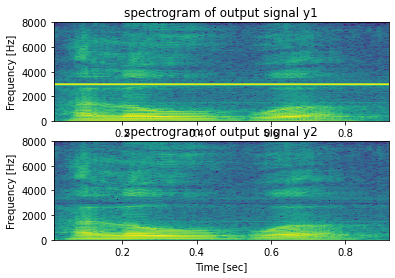

In [28]:
ipnoisyfilename = 'helloworld_noisy_16bit.wav'
_, sampleX_16bit = read_sound(ipnoisyfilename)
    #To float
x = fnNormalize16BitToFloat(sampleX_16bit)
    #Coeff for filter
B = [1, -0.7653668, 0.99999]
A = [1, -0.722744, 0.888622]

    #Filtering
y_ifil = signal.lfilter(B, A, x)
y_ifil_16bit = fnNormalizeFloatTo16Bit(y_ifil)
y_ifil_name = 'y_ifil.wav'
save_sound(y_ifil_name, 16000, y_ifil_16bit)
play_sound(y_ifil_name)

    #Plotting Spectrogram
[f1, t1, Sxx1] = signal.spectrogram(x, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
[f2, t2, Sxx2] = signal.spectrogram(y_ifil, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
_, ax = plt.subplots(2, 1)

ax[0].pcolormesh(t1, f1, 10*np.log10(Sxx1))
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')
ax[0].set_title('spectrogram of output signal y1')

ax[1].pcolormesh(t2, f2, 10*np.log10(Sxx2))
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
ax[1].set_title('spectrogram of output signal y2')
plt.show()

## Question 5f

In [29]:
x = np.zeros(10, dtype=float)
x[0] = 1
B = [1, -0.7653668, 0.99999]
A = [1, -0.722744, 0.888622]
y_ifil = signal.lfilter(B, A, x)
print(y_ifil)

[ 1.         -0.0426228   0.08056263  0.09610171 -0.00213279 -0.08693955
 -0.0609398   0.03321253  0.0781566   0.02697383]
